<a href="https://colab.research.google.com/github/zhafar3adib/homecreditindonesia_sampledata/blob/main/Home_Credit_Indonesia_Data_Scientist_Virtual_Internship_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Home Credit Indonesia Data Scientist Virtual Internship Program

---
Creating a Machine Learning Model that suited with Home Credit Indonesia needs. 

This Virtual Internship Program is run by Rakamin Academy.

Created by: Zhafar Tri Adib

Let's Keep in touch [LinkedIn](https://www.linkedin.com/in/zhafartriadib) [GitHub](https://github.com/zhafar3adib/)

Check Also [Home Credit Indonesia](https://www.homecredit.co.id/) and [Rakamin Academy](https://www.rakamin.com/)

##Intro - Objective and Metrics
Home Credit Indonesia is a finance company that provides financing services for client (loan). We will create a machine learning model using Home Credit Indonesia dataset, you can check the dataset [here](https://drive.google.com/drive/folders/1ZrPTlarxaJJo4w0hhyxlYi5UrrCIs9n0?usp=sharing). We will make sure the client who can fulfill the payment are not rejected when applying for loan.

Since the label target is:
* 1 for client **with** payment difficulties
* 0 for client **without** payment difficulties

We can decide that our **objective** is create a machine learning model with the least false positive and implemented it to another dataset, false positive and true positive will be the **metrics** for this case.

## 1 - Import Library

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2 - Data Preparation and Cleansing
Home Credit Indonesia provided with more than one dataset, atleast we use 2 dataset:
* application_train : we will using this dataset to create the machine learning model and evaluate it.
* application_test : the machine learning model will be implemented in this dataset.

###application_train

In [ ]:
path = "/content/drive/MyDrive/homecreditindonesia_sampledata/application_train.csv"
application_train_raw = pd.read_csv(path)
application_train_raw.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Since the dataset are too large with 307511 columns and 122 columns. We only use important column with  the most least Null or Blank Value.

In [ ]:
important_column = []
for i in range (0,10):
  important_column.append(i)

for i in range (12,16):
  important_column.append(i)

important_column.append(17)

for i in range (29,31):
  important_column.append(i)  

In [ ]:
application_train = application_train_raw.iloc[:,important_column]
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,1.0,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,-16765,2.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,1.0,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,2.0,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,1.0,2


**DAYS_BIRTH** column contains integer that represent the age of client in days, so we need to convert it to year

In [ ]:
application_train['DAYS_BIRTH'] = application_train['DAYS_BIRTH']*-1/365
application_train['DAYS_BIRTH'] = np.floor(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'] = application_train['DAYS_BIRTH'].astype('int')
application_train.columns = application_train.columns.str.replace('DAYS_BIRTH','AGE')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,25,1.0,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,45,2.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,1.0,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,52,2.0,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,54,1.0,2


In [ ]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_CURR            307511 non-null  int64  
 1   TARGET                307511 non-null  int64  
 2   NAME_CONTRACT_TYPE    307511 non-null  object 
 3   CODE_GENDER           307511 non-null  object 
 4   FLAG_OWN_CAR          307511 non-null  object 
 5   FLAG_OWN_REALTY       307511 non-null  object 
 6   CNT_CHILDREN          307511 non-null  int64  
 7   AMT_INCOME_TOTAL      307511 non-null  float64
 8   AMT_CREDIT            307511 non-null  float64
 9   AMT_ANNUITY           307499 non-null  float64
 10  NAME_INCOME_TYPE      307511 non-null  object 
 11  NAME_EDUCATION_TYPE   307511 non-null  object 
 12  NAME_FAMILY_STATUS    307511 non-null  object 
 13  NAME_HOUSING_TYPE     307511 non-null  object 
 14  AGE                   307511 non-null  int64  
 15  

I will use another dataset to gain additional information:
* previous_application : to find if client are have a previous application (Existing) or not (New) in Home Credit Indonesia
* bureau : to find if client have applied at bureau credit (Y) or not (N)

The information needed will attached to the application_train dataset using join method

In [ ]:
path = "/content/drive/MyDrive/homecreditindonesia_sampledata/previous_application.csv"
previous_application_raw = pd.read_csv(path)
previous_application_raw.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
previous_application = pd.DataFrame(
    previous_application_raw.groupby('SK_ID_CURR').agg(COUNT = ('SK_ID_CURR','count'))).reset_index()
previous_application

,SK_ID_CURR,COUNT
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2
...,...,...
338852,456251,1
338853,456252,1
338854,456253,2
338855,456254,2


In [ ]:
path = "/content/drive/MyDrive/homecreditindonesia_sampledata/bureau.csv"
bureau_raw = pd.read_csv(path)
bureau_raw.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In bureau dataset, we will eliminate row where **CREDIT_ACTIVE** column values are Sold and Closed to filter the client who still have an active application in bureau

In [ ]:
bureau_raw.drop(bureau_raw.loc[(bureau_raw["CREDIT_ACTIVE"]=="Sold") | 
                               (bureau_raw["CREDIT_ACTIVE"]=="Closed")].index, inplace=True)

bureau = pd.DataFrame(data=(
    pd.pivot_table(bureau_raw, values='AMT_CREDIT_SUM',index='SK_ID_CURR',aggfunc='sum')),
    ).reset_index()
bureau

,SK_ID_CURR,AMT_CREDIT_SUM
0,100001,884025.000
1,100002,481988.565
2,100003,810000.000
3,100005,598626.000
4,100008,267606.000
...,...,...
251815,456247,4113000.000
251816,456249,405000.000
251817,456250,2603110.050
251818,456253,2610000.000


In [ ]:
application_train = application_train.join(
    previous_application.set_index('SK_ID_CURR'), on='SK_ID_CURR', how='left')
application_train = application_train.join(
    bureau.set_index('SK_ID_CURR'), on='SK_ID_CURR', how='left')
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,COUNT,AMT_CREDIT_SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,25,1.0,2,1.0,481988.565
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,45,2.0,1,3.0,810000.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,1.0,2,1.0,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,52,2.0,2,9.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,54,1.0,2,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,25,1.0,1,1.0,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,Widow,House / apartment,56,1.0,2,1.0,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,41,1.0,3,2.0,2610000.000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,Married,House / apartment,32,2.0,2,2.0,NaN


In [ ]:
application_train['COUNT'] = application_train['COUNT'].fillna(0)
application_train['AMT_CREDIT_SUM'] = application_train['AMT_CREDIT_SUM'].fillna(0)

application_train['COUNT'] = application_train['COUNT'].apply(
    lambda x: 'New' if x == 0 else 'Existing')
application_train['AMT_CREDIT_SUM'] = application_train['AMT_CREDIT_SUM'].apply(
    lambda x: 'N' if x == 0 else 'Y')

application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,COUNT,AMT_CREDIT_SUM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,25,1.0,2,Existing,Y
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,45,2.0,1,Existing,Y
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,52,1.0,2,Existing,N
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,52,2.0,2,Existing,N
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,54,1.0,2,Existing,N


Checking the null value. Since the null value are in the numeric column, we will replace the null value with 0 and change the column name resulted from join with another dataset.

In [ ]:
application_train.isnull().sum()

SK_ID_CURR               0
TARGET                   0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY             12
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
AGE                      0
CNT_FAM_MEMBERS          2
REGION_RATING_CLIENT     0
COUNT                    0
AMT_CREDIT_SUM           0
dtype: int64

In [ ]:
application_train['AMT_ANNUITY'] = application_train['AMT_ANNUITY'].fillna(0)
application_train['CNT_FAM_MEMBERS'] = application_train['CNT_FAM_MEMBERS'].fillna(0)
application_train.columns = application_train.columns.str.replace('COUNT','NEW/EXISTING')
application_train.columns = application_train.columns.str.replace('AMT_CREDIT_SUM','BUREAU_CREDIT')

In [ ]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_CURR            307511 non-null  int64  
 1   TARGET                307511 non-null  int64  
 2   NAME_CONTRACT_TYPE    307511 non-null  object 
 3   CODE_GENDER           307511 non-null  object 
 4   FLAG_OWN_CAR          307511 non-null  object 
 5   FLAG_OWN_REALTY       307511 non-null  object 
 6   CNT_CHILDREN          307511 non-null  int64  
 7   AMT_INCOME_TOTAL      307511 non-null  float64
 8   AMT_CREDIT            307511 non-null  float64
 9   AMT_ANNUITY           307511 non-null  float64
 10  NAME_INCOME_TYPE      307511 non-null  object 
 11  NAME_EDUCATION_TYPE   307511 non-null  object 
 12  NAME_FAMILY_STATUS    307511 non-null  object 
 13  NAME_HOUSING_TYPE     307511 non-null  object 
 14  AGE                   307511 non-null  int64  
 15  

Here are the brief explanation for each column:
* **SK_ID_CURR** : ID of loan
* **TARGET** : 1 (Positive) - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 (Negative) - all other cases
* **NAME_CONTRACT_TYPE** : Identification if loan is cash or revolving
* **CODE_GENDER** : Gender of the client
* **FLAG_OWN_CAR** : Flag if the client owns a car 
* **FLAG_OWN_REALTY** : Flag if client owns a house or flat
* **CNT_CHILDREN** : Number of children the client has
* **AMT_INCOME_TOTAL** : Income of the client
* **AMT_CREDIT** : Credit amount of the loan
* **AMT_ANNUITY** : Loan annuity
* **NAME_INCOME_TYPE** : Clients income type (businessman, working, maternity leave,…)
* **NAME_EDUCATION_TYPE** : Level of highest education the client achieved
* **NAME_FAMILY_STATUS** : Family status of the client 
* **NAME_HOUSING_TYPE** : What is the housing situation of the client (renting, living with parents, ...)
* **AGE** : Age of client
* **CNT_FAM_MEMBERS** : How many family members does client have
* **REGION_RATING_CLIENT** : Rating of the region where client lives (1,2,3)
* **NEW/EXISTING** : Client have a previous application or not
* **BUREAU_CREDIT** : Client have a application at Bureau

After checking all column unique value, there are some string with 'XNA' or 'Unknown', we will replace it with the mode for each column.

In [ ]:
application_train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
application_train['CODE_GENDER'] = application_train['CODE_GENDER'].str.replace("XNA","F")
application_train.groupby('CODE_GENDER').agg(COUNT = ('CODE_GENDER','count')).reset_index()

,CODE_GENDER,COUNT
0,F,202452
1,M,105059


In [ ]:
application_train['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [ ]:
application_train['NAME_FAMILY_STATUS'] = application_train[
    'NAME_FAMILY_STATUS'].str.replace("Unknown","Married")
application_train.groupby('NAME_FAMILY_STATUS').agg(COUNT = ('NAME_FAMILY_STATUS','count')).reset_index()

,NAME_FAMILY_STATUS,COUNT
0,Civil marriage,29775
1,Married,196434
2,Separated,19770
3,Single / not married,45444
4,Widow,16088


###application_test
The difference in this dataset, there are no **TARGET** column. We will repeat the step at application_train 

In [ ]:
path = "/content/drive/MyDrive/homecreditindonesia_sampledata/application_test.csv"
application_test_raw = pd.read_csv(path)
application_test_raw.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
important_column = []
for i in range (0,9):
  important_column.append(i)

for i in range (11,15):
  important_column.append(i)

important_column.append(16)

for i in range (28,30):
  important_column.append(i)  

In [ ]:
application_test = application_test_raw.iloc[:,important_column]
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,Working,Higher education,Married,House / apartment,-19241,2.0,2
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,Working,Secondary / secondary special,Married,House / apartment,-18064,2.0,2
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,Working,Higher education,Married,House / apartment,-20038,2.0,2
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,Working,Secondary / secondary special,Married,House / apartment,-13976,4.0,2
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,Working,Secondary / secondary special,Married,House / apartment,-13040,3.0,2


In [ ]:
application_test['DAYS_BIRTH'] = application_test['DAYS_BIRTH']*-1/365
application_test['DAYS_BIRTH'] = np.floor(application_test['DAYS_BIRTH'])
application_test['DAYS_BIRTH'] = application_test['DAYS_BIRTH'].astype('int')
application_test.columns = application_test.columns.str.replace('DAYS_BIRTH','AGE')
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,Working,Higher education,Married,House / apartment,52,2.0,2
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,Working,Secondary / secondary special,Married,House / apartment,49,2.0,2
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,Working,Higher education,Married,House / apartment,54,2.0,2
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,Working,Secondary / secondary special,Married,House / apartment,38,4.0,2
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,Working,Secondary / secondary special,Married,House / apartment,35,3.0,2


In [ ]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SK_ID_CURR            48744 non-null  int64  
 1   NAME_CONTRACT_TYPE    48744 non-null  object 
 2   CODE_GENDER           48744 non-null  object 
 3   FLAG_OWN_CAR          48744 non-null  object 
 4   FLAG_OWN_REALTY       48744 non-null  object 
 5   CNT_CHILDREN          48744 non-null  int64  
 6   AMT_INCOME_TOTAL      48744 non-null  float64
 7   AMT_CREDIT            48744 non-null  float64
 8   AMT_ANNUITY           48720 non-null  float64
 9   NAME_INCOME_TYPE      48744 non-null  object 
 10  NAME_EDUCATION_TYPE   48744 non-null  object 
 11  NAME_FAMILY_STATUS    48744 non-null  object 
 12  NAME_HOUSING_TYPE     48744 non-null  object 
 13  AGE                   48744 non-null  int64  
 14  CNT_FAM_MEMBERS       48744 non-null  float64
 15  REGION_RATING_CLIEN

In [ ]:
application_test = application_test.join(
    previous_application.set_index('SK_ID_CURR'), on='SK_ID_CURR', how='left')
application_test = application_test.join(
    bureau.set_index('SK_ID_CURR'), on='SK_ID_CURR', how='left')
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,COUNT,AMT_CREDIT_SUM
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,Working,Higher education,Married,House / apartment,52,2.0,2,1.0,884025.00
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,Working,Secondary / secondary special,Married,House / apartment,49,2.0,2,2.0,598626.00
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,Working,Higher education,Married,House / apartment,54,2.0,2,4.0,NaN
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,Working,Secondary / secondary special,Married,House / apartment,38,4.0,2,5.0,864721.08
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,Working,Secondary / secondary special,Married,House / apartment,35,3.0,2,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,Working,Secondary / secondary special,Widow,House / apartment,54,1.0,3,1.0,837931.50
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,Commercial associate,Secondary / secondary special,Married,House / apartment,30,4.0,2,4.0,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,Commercial associate,Secondary / secondary special,Married,House / apartment,43,3.0,2,2.0,50547.96
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,Commercial associate,Higher education,Married,House / apartment,38,2.0,2,5.0,2165689.08


In [ ]:
application_test['COUNT'] = application_test['COUNT'].fillna(0)
application_test['AMT_CREDIT_SUM'] = application_test['AMT_CREDIT_SUM'].fillna(0)

application_test['COUNT'] = application_test['COUNT'].apply(
    lambda x: 'New' if x == 0 else 'Existing')
application_test['AMT_CREDIT_SUM'] = application_test['AMT_CREDIT_SUM'].apply(
    lambda x: 'N' if x == 0 else 'Y')

application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,COUNT,AMT_CREDIT_SUM
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,Working,Higher education,Married,House / apartment,52,2.0,2,Existing,Y
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,Working,Secondary / secondary special,Married,House / apartment,49,2.0,2,Existing,Y
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,Working,Higher education,Married,House / apartment,54,2.0,2,Existing,N
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,Working,Secondary / secondary special,Married,House / apartment,38,4.0,2,Existing,Y
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,Working,Secondary / secondary special,Married,House / apartment,35,3.0,2,Existing,N


In [ ]:
application_test.isnull().sum()

SK_ID_CURR               0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY             24
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
AGE                      0
CNT_FAM_MEMBERS          0
REGION_RATING_CLIENT     0
COUNT                    0
AMT_CREDIT_SUM           0
dtype: int64

In [ ]:
application_test['AMT_ANNUITY'] = application_test['AMT_ANNUITY'].fillna(0)
application_test.columns = application_test.columns.str.replace('COUNT','NEW/EXISTING')
application_test.columns = application_test.columns.str.replace('AMT_CREDIT_SUM','BUREAU_CREDIT')

In [ ]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SK_ID_CURR            48744 non-null  int64  
 1   NAME_CONTRACT_TYPE    48744 non-null  object 
 2   CODE_GENDER           48744 non-null  object 
 3   FLAG_OWN_CAR          48744 non-null  object 
 4   FLAG_OWN_REALTY       48744 non-null  object 
 5   CNT_CHILDREN          48744 non-null  int64  
 6   AMT_INCOME_TOTAL      48744 non-null  float64
 7   AMT_CREDIT            48744 non-null  float64
 8   AMT_ANNUITY           48744 non-null  float64
 9   NAME_INCOME_TYPE      48744 non-null  object 
 10  NAME_EDUCATION_TYPE   48744 non-null  object 
 11  NAME_FAMILY_STATUS    48744 non-null  object 
 12  NAME_HOUSING_TYPE     48744 non-null  object 
 13  AGE                   48744 non-null  int64  
 14  CNT_FAM_MEMBERS       48744 non-null  float64
 15  REGION_RATING_CLIEN

Here are the brief explanation for each column:
* **SK_ID_CURR** : ID of loan
* **NAME_CONTRACT_TYPE** : Identification if loan is cash or revolving
* **CODE_GENDER** : Gender of the client
* **FLAG_OWN_CAR** : Flag if the client owns a car 
* **FLAG_OWN_REALTY** : Flag if client owns a house or flat
* **CNT_CHILDREN** : Number of children the client has
* **AMT_INCOME_TOTAL** : Income of the client
* **AMT_CREDIT** : Credit amount of the loan
* **AMT_ANNUITY** : Loan annuity
* **NAME_INCOME_TYPE** : Clients income type (businessman, working, maternity leave,…)
* **NAME_EDUCATION_TYPE** : Level of highest education the client achieved
* **NAME_FAMILY_STATUS** : Family status of the client 
* **NAME_HOUSING_TYPE** : What is the housing situation of the client (renting, living with parents, ...)
* **AGE** : Age of client
* **CNT_FAM_MEMBERS** : How many family members does client have
* **REGION_RATING_CLIENT** : Rating of the region where client lives (1,2,3)
* **NEW/EXISTING** : Client have a previous application or not
* **BUREAU_CREDIT** : Client have a application at Bureau

## 3 - Exploratory Data Analysis

###Target Proportion

0    282686
1     24825
Name: TARGET, dtype: int64

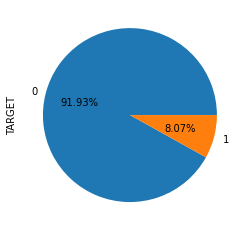

In [ ]:
application_train['TARGET'].value_counts().plot(kind='pie',autopct='%.2f%%')
application_train['TARGET'].value_counts()

The proportion for **TARGET** column as label is imbalanced, this will impacted the machine learning model. We will decide later to balance the proportion or not.

###Distribution of Numeric Column

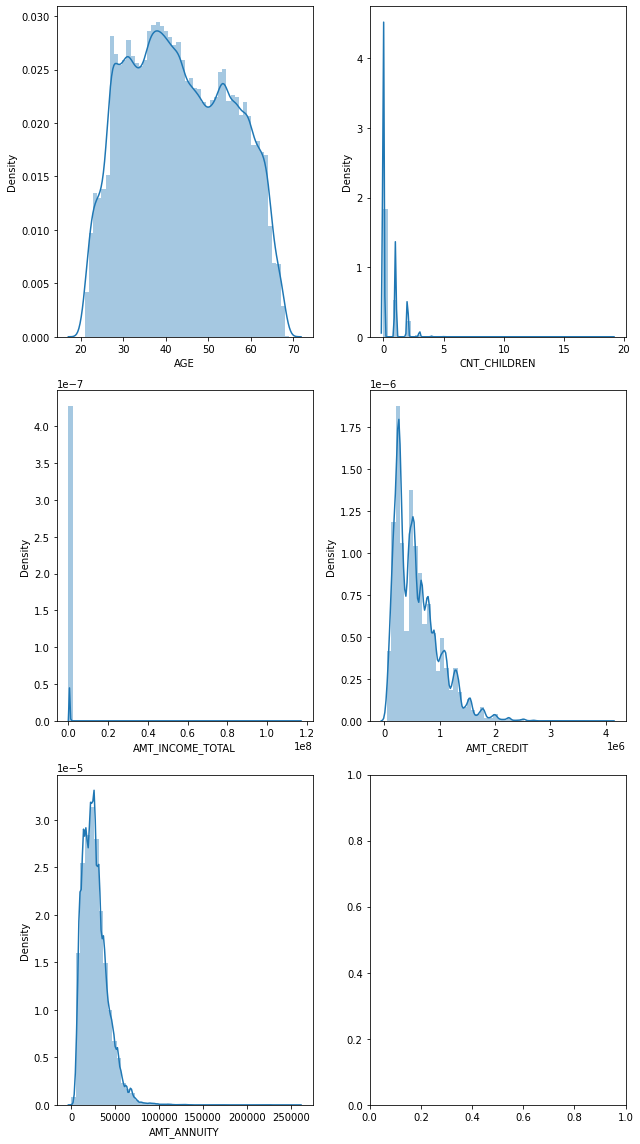

In [ ]:
numeric_columns = ['AGE','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']

fig, axes = plt.subplots(3,2, figsize=(9,16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numeric_columns):
  plot = sns.distplot(application_train[col], ax=axes[i])

plt.tight_layout()

We can see the distribution of **Numeric Column** have a positive skew except for **AGE** column which the skewness near normal distribution.

###Countplot for Categorical Column

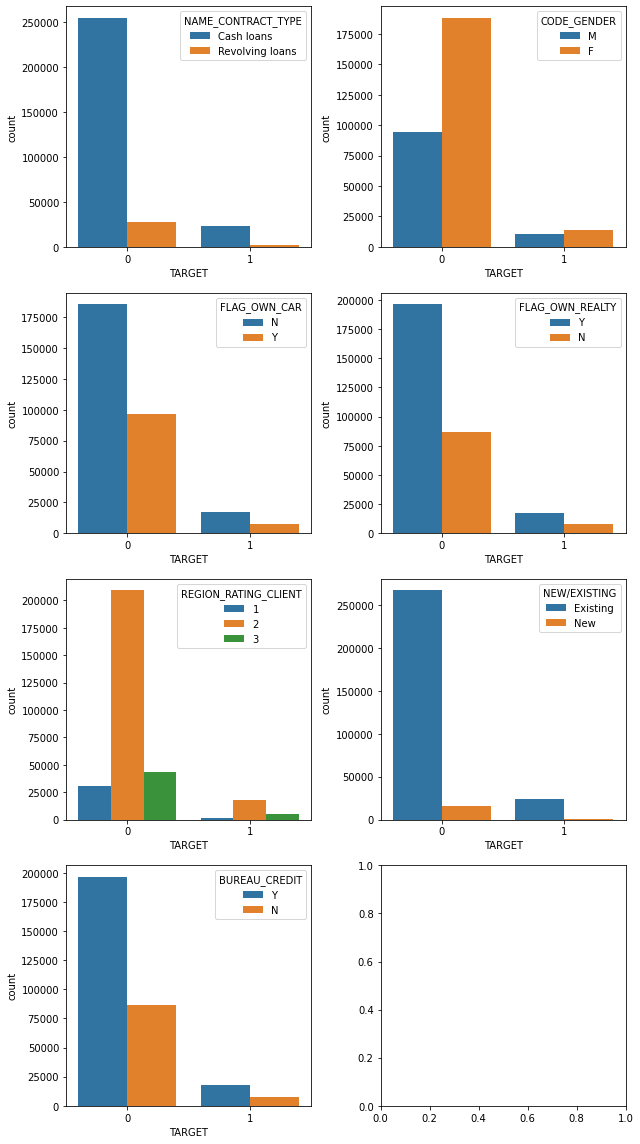

In [ ]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                       'REGION_RATING_CLIENT','NEW/EXISTING','BUREAU_CREDIT']

fig, axes = plt.subplots(4,2, figsize=(9,16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(categorical_columns):
  plot = sns.countplot(x="TARGET", hue=application_train[col], ax=axes[i], data=application_train)

plt.tight_layout()

We can see the characteristic of client with 0 or 1 label, the categorical column with more than 3 value will shown in separate countplot to get a better view. 

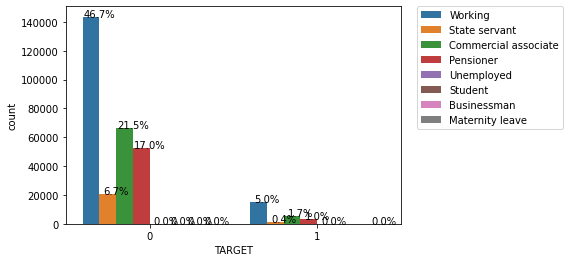

In [ ]:
ax = sns.countplot(x="TARGET",hue='NAME_INCOME_TYPE', data=application_train)
total = float(len(application_train))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

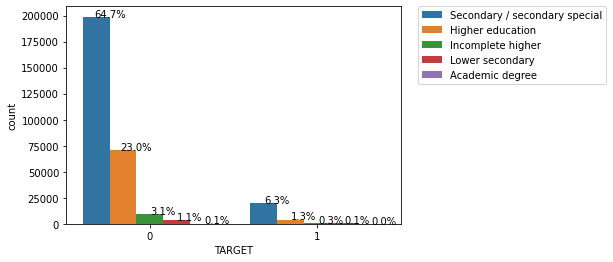

In [ ]:
ax = sns.countplot(x="TARGET",hue='NAME_EDUCATION_TYPE', data=application_train)
total = float(len(application_train))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

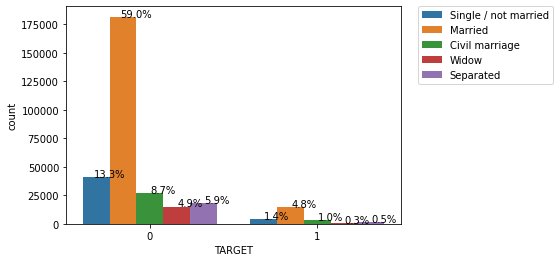

In [ ]:
ax = sns.countplot(x="TARGET",hue='NAME_FAMILY_STATUS', data=application_train)
total = float(len(application_train))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

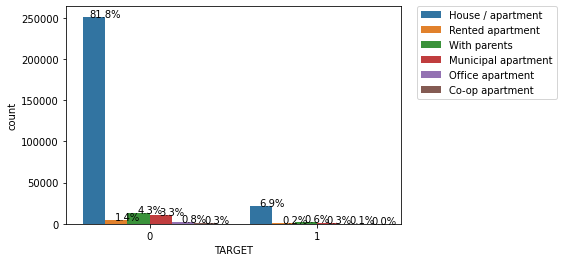

In [ ]:
ax = sns.countplot(x="TARGET",hue='NAME_HOUSING_TYPE', data=application_train)
total = float(len(application_train))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

###Correlation Heatmap

In [ ]:
application_train_corr = application_train.copy()

categ = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
         'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_RATING_CLIENT',
         'NEW/EXISTING','BUREAU_CREDIT']
le = LabelEncoder()
application_train_corr[categ] = application_train_corr[categ].apply(le.fit_transform)
application_train_corr = application_train_corr.iloc[:,1:]
application_train_corr.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,NEW/EXISTING,BUREAU_CREDIT
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,7,4,3,1,25,1.0,1,0,1
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,4,1,1,1,45,2.0,0,0,1
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,7,4,3,1,52,1.0,1,0,0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,7,4,0,1,52,2.0,1,0,0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,7,4,3,1,54,1.0,1,0,0


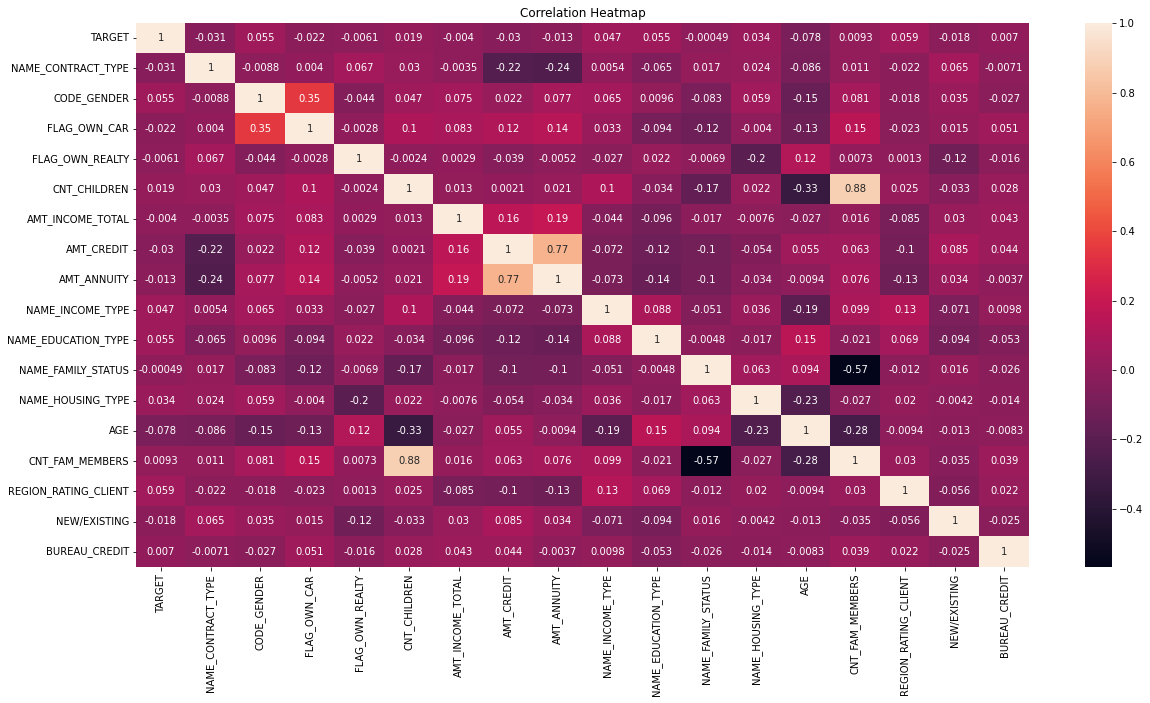

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(application_train_corr.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

The correlation score between variables, the closer the correlation score to 0 indicates the weaker the correlation. Minus correlation mean the variable have a contradictive correlation.

## 4 - Machine Learning

We will create machine learning model using application_train and evaluate it, atleast we will use 2 method:
* Logistic Regression
* Random Forest Classifier

This method included over sampling and hyperparameter tuning, so we can compare which method best for the dataset. As i mentioned before, we will find model with the least **False Positive**.

###Preparation

In [ ]:
#semua yang numeric perlu di standarization dulu pake standardscaler
#cari true positive, true negative dan
#dia sebenernya gak bermasalah, tapi terpredict sebagai bermaslaah, false positive rendah

In [ ]:
application_train_ml = application_train.copy()

categ = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
         'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_RATING_CLIENT',
         'NEW/EXISTING','BUREAU_CREDIT']
le = LabelEncoder()
application_train_ml[categ] = application_train_ml[categ].apply(le.fit_transform)
application_train_ml = application_train_ml.iloc[:,1:]
application_train_ml.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,NEW/EXISTING,BUREAU_CREDIT
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,7,4,3,1,25,1.0,1,0,1
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,4,1,1,1,45,2.0,0,0,1
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,7,4,3,1,52,1.0,1,0,0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,7,4,0,1,52,2.0,1,0,0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,7,4,3,1,54,1.0,1,0,0


Encode the categorical value column into numerical value

###Logistic Regression

####Logistic Regression without balancing dataset

Accuracy  0.9190604201443839
Precision  0.45953021007219197
Recall  0.5
f1 score  0.4789116645296852
Confusion matrix  [[84787     0]
 [ 7467     0]]


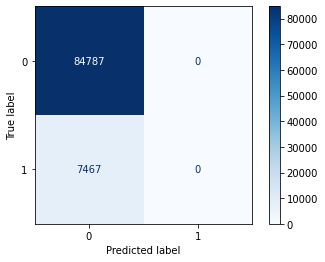

In [ ]:
X = application_train_ml.iloc[:,1:]
y = application_train_ml['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=LogisticRegression(max_iter=200, solver='sag')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

#### Logistic Regression with balancing dataset

sebelum SMOTE
TARGET
0         197899
1          17358
dtype: int64
setelah SMOTE
TARGET
0         197899
1         197899
dtype: int64
Accuracy  0.6017083270102109
Precision  0.5328102359903268
Recall  0.6072067840159141
f1 score  0.4672697206853602
              precision    recall  f1-score   support

           0       0.95      0.60      0.73     84787
           1       0.12      0.61      0.20      7467

    accuracy                           0.60     92254
   macro avg       0.53      0.61      0.47     92254
weighted avg       0.88      0.60      0.69     92254

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f3d1b2be0d0>


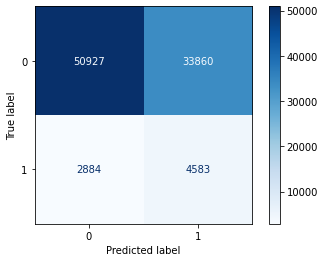

In [ ]:
X = application_train_ml.iloc[:,1:]
y = application_train_ml['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=LogisticRegression()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum SMOTE')
print(pd.DataFrame(y_train).value_counts())
print('setelah SMOTE')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

#### Logistic Regression using Hyperparamater Tuning

In [ ]:
X = application_train_ml.iloc[:,1:]
y = application_train_ml['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression()

param_dist = {"class_weight": ['balanced','dict'],
              "solver":['lbfgs','sag','saga']}

grid_objt = GridSearchCV(model, param_grid=param_dist)

grid_objt.fit(X_train, y_train)

grid_objt.best_estimator_

LogisticRegression(class_weight='dict')

Since, using SMOTE to make dataset balanced increase the False Positive level significantly. We should continue without balancing dataset.

Accuracy  0.9190604201443839
Precision  0.45953021007219197
Recall  0.5
f1 score  0.4789116645296852
Confusion matrix  [[84787     0]
 [ 7467     0]]


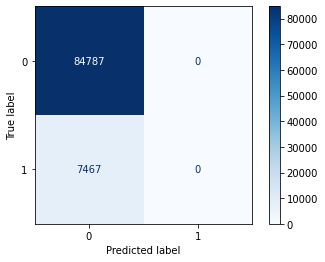

In [ ]:
X = application_train_ml.iloc[:,1:]
y = application_train_ml['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=LogisticRegression(class_weight='dict')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###Random Forest

####Random Forest without balancing dataset

Accuracy  0.9184534003945628
Precision  0.5467831240424462
Recall  0.5005857231831617
f1 score  0.4807291491365756
Confusion matrix  [[84716    71]
 [ 7452    15]]


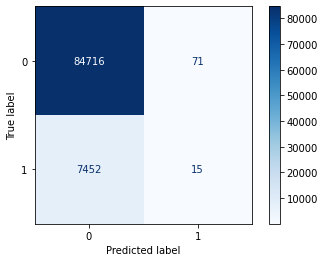

In [ ]:
X = application_train_ml.iloc[:,1:]
y = application_train_ml['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

####Random Forest with balancing dataset

sebelum SMOTE
TARGET
0         197899
1          17358
dtype: int64
setelah SMOTE
TARGET
0         197899
1         197899
dtype: int64
Accuracy  0.8948988661738244
Precision  0.5352309005021023
Recall  0.5157386466903635
f1 score  0.5165629901084071
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     84787
           1       0.15      0.06      0.09      7467

    accuracy                           0.89     92254
   macro avg       0.54      0.52      0.52     92254
weighted avg       0.86      0.89      0.88     92254

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f3d20276690>


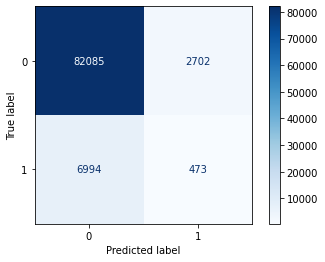

In [ ]:
X = application_train_ml.iloc[:,1:]
y = application_train_ml['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=RandomForestClassifier(random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum SMOTE')
print(pd.DataFrame(y_train).value_counts())
print('setelah SMOTE')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

####Random Forest using Hyperparameter Tuning

In [ ]:
X = application_train_ml.iloc[:,1:]
y = application_train_ml['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = RandomForestClassifier()

param_dist = {"random_state":[1],
              "criterion": ['gini','entropy'],
              "max_features":["sqrt", "log2"]}

grid_objt = GridSearchCV(model, param_grid=param_dist)

grid_objt.fit(X_train, y_train)

grid_objt.best_estimator_

RandomForestClassifier(max_features='sqrt', random_state=1)

After balancing dataset, False Positive level increased but the increase is tolerated with increase of True Positive. We should continue using with balancing dataset.

sebelum SMOTE
TARGET
0         197899
1          17358
dtype: int64
setelah SMOTE
TARGET
0         197899
1         197899
dtype: int64
Accuracy  0.8948988661738244
Precision  0.5352309005021023
Recall  0.5157386466903635
f1 score  0.5165629901084071
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     84787
           1       0.15      0.06      0.09      7467

    accuracy                           0.89     92254
   macro avg       0.54      0.52      0.52     92254
weighted avg       0.86      0.89      0.88     92254

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f3d1a1fdc10>


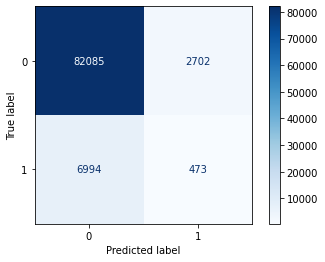

In [ ]:
X = application_train_ml.iloc[:,1:]
y = application_train_ml['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=RandomForestClassifier(random_state=1,max_features='sqrt')
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum SMOTE')
print(pd.DataFrame(y_train).value_counts())
print('setelah SMOTE')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

###Implementation

We will implement Random Forest method with balancing dataset.

If our goal are to find method with least False Positive, why don't use Logistic Regression with 0 False Positive? The 0 False Positive in Logistic Regression is including 0 True Positive, that means there will no Positive label. We try before to use Logistic Regression with balancing dataset and the result is the increase amount of False Positive significantly.

In [ ]:
application_test_ml = application_test.copy()

categ = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
         'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_RATING_CLIENT',
         'NEW/EXISTING','BUREAU_CREDIT']
le = LabelEncoder()
application_test_ml[categ] = application_test_ml[categ].apply(le.fit_transform)
application_test_ml = application_test_ml.iloc[:,1:]
application_test_ml.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,NEW/EXISTING,BUREAU_CREDIT
0,0,0,0,1,0,135000.0,568800.0,20560.5,6,1,1,1,52,2.0,1,0,1
1,0,1,0,1,0,99000.0,222768.0,17370.0,6,4,1,1,49,2.0,1,0,1
2,0,1,1,1,0,202500.0,663264.0,69777.0,6,1,1,1,54,2.0,1,0,0
3,0,0,0,1,2,315000.0,1575000.0,49018.5,6,4,1,1,38,4.0,1,0,1
4,0,1,1,0,1,180000.0,625500.0,32067.0,6,4,1,1,35,3.0,1,0,0


In [ ]:
X_train = application_train_ml.iloc[:,1:]
y_train = application_train_ml['TARGET']
X_test = application_test_ml.copy()

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=RandomForestClassifier(random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

In [ ]:
application_test_final = application_test.copy()
application_test_final['TARGET'] = y_pred.tolist()
application_test_final.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,NEW/EXISTING,BUREAU_CREDIT,TARGET
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,Working,Higher education,Married,House / apartment,52,2.0,2,Existing,Y,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,Working,Secondary / secondary special,Married,House / apartment,49,2.0,2,Existing,Y,1
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,Working,Higher education,Married,House / apartment,54,2.0,2,Existing,N,0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,Working,Secondary / secondary special,Married,House / apartment,38,4.0,2,Existing,Y,0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,Working,Secondary / secondary special,Married,House / apartment,35,3.0,2,Existing,N,0


0    45289
1     3455
Name: TARGET, dtype: int64

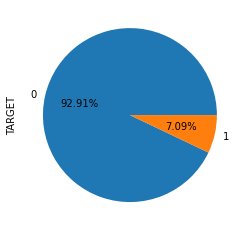

In [ ]:
application_test_final['TARGET'].value_counts().plot(kind='pie',autopct='%.2f%%')
application_test_final['TARGET'].value_counts()

## Outro - Conclusion and Business Recomendation
Since Home Credit Indonesia objective is to find a client that will fulfill the payment are not rejected when applying for a loan. We should focused on created model with the least False Positive level, but we should don't forget the other metrics on confusion matrix. For example, the Logistic Regression method we created before resulted 0 False Positive and 0 True Positive. 0 True Positive in this case means there are no positive label (1 - client with payment difficulties), that affect every application output will become negative label (0 - client without payment difficulties) and will increase amount of bad debt / bad loan significantly. If this happen it will harm the company financial.

I recommend Home Credit Indonesia give special attention to client characteristic with negative label (0 - client without payment difficulties) to increase the amount of loan application. For example for client live in REGION_RATING number 2. The special attention means could be anything, like deadline payment relief, smaller amount of annuity, or increasing loan limit. Using the machine learning, Home Credit Indonesia will minimize the occurent of client who can fulfill the payment to get their loan application rejected or client with payment difficulties get their loan application approved.